In [ ]:
data = pd.read_csv("Article_data.csv")
acronyms = pd.read_csv('acronymss.csv')

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

import re
from num2words import num2words
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

import tensorflow_hub as hub

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split



[nltk_data] Downloading package stopwords to C:\Users\Star
[nltk_data]     r\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Star
[nltk_data]     r\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Star
[nltk_data]     r\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Star
[nltk_data]     r\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Codes

In [ ]:
data

,text,class
0,"On Tuesday afternoon, Miami-Dade Police tweete...",1
1,A big Russian civilisation concept envisages n...,1
2,Nassau County cops busted a Long Island man wh...,1
3,By LAURA MOWAT \nLocals are fuming because the...,1
4,"At one time, Ann Coulter thought Donald Trump ...",1
...,...,...
465,The latest test of a new North Korean intercon...,0
466,"Republicans are starting to stammer, talk of d...",0
467,President Donald Trump on Wednesday again rais...,0
468,U.S. Democratic Senator Claire McCaskill on Th...,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    470 non-null    object
 1   class   470 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.5+ KB


In [ ]:
data.dropna(inplace=True)

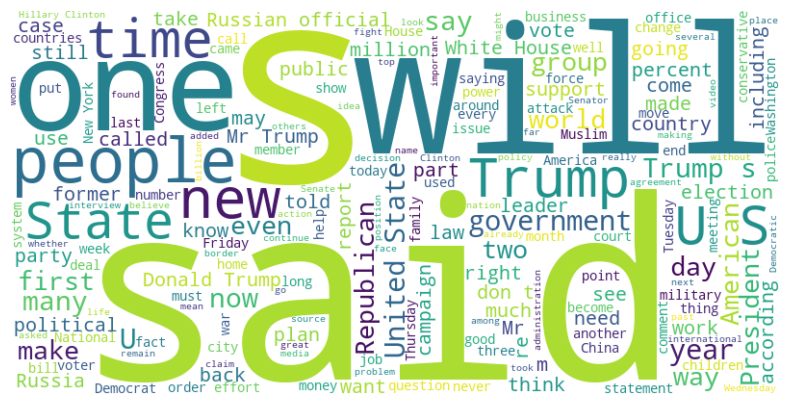

In [ ]:
text = " ".join(review for review in data.text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50646 entries, 0 to 50666
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50646 non-null  object
 1   class   50646 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [ ]:
def expand_abbreviations(text, abbr_dict):
    # Make sure text is a string
    if not isinstance(text, str):
        return text  # or return '' if you prefer to turn non-strings into empty strings
    pattern = re.compile(r'\b(' + '|'.join(map(re.escape, abbr_dict.keys())) + r')\b')
    result = pattern.sub(lambda x: abbr_dict.get(x.group(), x.group()), text)
    return result

def text_cleaning(data, acronyms):
    # Convert acronyms DataFrame to a dictionary
    abbr_dict = pd.Series(acronyms['Meaning'].values, index=acronyms['Title']).to_dict()

    # Ensure text column is of type string and handle NaN values
    data['text'] = data['text'].astype(str)

    # Expand abbreviations
    data['text'] = data['text'].apply(lambda x: expand_abbreviations(x, abbr_dict))

    # Convert text to lower case
    data['text'] = data['text'].str.lower()

    # Remove special characters
    data['text'] = data['text'].str.replace('[^\w\s]', '', regex=True)

    # Convert numbers to words
    data['text'] = data['text'].apply(lambda x: ' '.join([num2words(word) if word.isdigit() else word for word in x.split()]))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Lemmatization and Stemming
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    data['text'] = data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(stemmer.stem(word)) for word in word_tokenize(x)]))

    return data



cleaned_data = text_cleaning(data, acronyms)

<>:23: SyntaxWarning: invalid escape sequence '\w'
<>:23: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Star r\AppData\Local\Temp\ipykernel_17092\622879569.py:23: SyntaxWarning: invalid escape sequence '\w'
  data['text'] = data['text'].str.replace('[^\w\s]', '', regex=True)


In [ ]:
data

,text,class
0,tuesday afternoon miamidad polic tweet pictur ...,1
1,big russian civilis concept envisag neither ch...,1
2,nassau counti cop bust long island man previou...,1
3,laura mowat local fume allow site southeastern...,1
4,one time ann coulter thought donald trump grea...,1
...,...,...
465,latest test new north korean intercontinent ba...,0
466,republican start stammer talk delay say cant r...,0
467,presid donald trump wednesday rais possibl u g...,0
468,u democrat senat clair mccaskil thursday expan...,0


# DATA ENCODER

## USE

In [ ]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def embed_text_and_add_to_dataframe(data):

    data['text'] = data['text'].astype(str)

    embeddings = embed(data['text'])

    data['USE Embedding'] = list(embeddings.numpy())

    return data

data = embed_text_and_add_to_dataframe(data)

In [ ]:
data

,text,class,USE Embedding
0,tuesday afternoon miamidad polic tweet pictur ...,1,"[-0.056915425, -0.033290565, -0.05502738, 0.00..."
1,big russian civilis concept envisag neither ch...,1,"[-0.01484888, -0.06303935, -0.064371735, 0.028..."
2,nassau counti cop bust long island man previou...,1,"[-0.056339208, -0.03931767, -0.016856583, -0.0..."
3,laura mowat local fume allow site southeastern...,1,"[-0.059397273, 0.05634889, -0.0063241795, -0.0..."
4,one time ann coulter thought donald trump grea...,1,"[0.04765306, -0.047658898, 0.040948167, -0.047..."
...,...,...,...
465,latest test new north korean intercontinent ba...,0,"[0.044078846, -0.052889295, -0.05283902, 0.013..."
466,republican start stammer talk delay say cant r...,0,"[0.045666587, -0.04891647, -0.048732754, 0.048..."
467,presid donald trump wednesday rais possibl u g...,0,"[0.0189171, -0.05514298, -0.02111301, -0.04553..."
468,u democrat senat clair mccaskil thursday expan...,0,"[-0.043465298, -0.059329443, -0.034335814, 0.0..."


In [ ]:
data_after_encoded = data.drop(columns=['text'])

In [ ]:
data_after_encoded

,class,USE Embedding
0,1,"[-0.056915425, -0.033290565, -0.05502738, 0.00..."
1,1,"[-0.01484888, -0.06303935, -0.064371735, 0.028..."
2,1,"[-0.056339208, -0.03931767, -0.016856583, -0.0..."
3,1,"[-0.059397273, 0.05634889, -0.0063241795, -0.0..."
4,1,"[0.04765306, -0.047658898, 0.040948167, -0.047..."
...,...,...
465,0,"[0.044078846, -0.052889295, -0.05283902, 0.013..."
466,0,"[0.045666587, -0.04891647, -0.048732754, 0.048..."
467,0,"[0.0189171, -0.05514298, -0.02111301, -0.04553..."
468,0,"[-0.043465298, -0.059329443, -0.034335814, 0.0..."


## POW

In [ ]:
def add_bow_encoding_to_dataframeta(data):
    # Ensure that all text data is string
    data['text'] = data['text'].astype(str)

    # Create the CountVectorizer, using English stop words
    vectorizer = CountVectorizer(stop_words='english')

    # Fit the model and transform the data
    bow_matrix = vectorizer.fit_transform(data['text'])

    # Convert to dense array and store in DataFrame
    data['BoW Encoder'] = list(bow_matrix.toarray())

    return data


data = add_bow_encoding_to_dataframe(data)

In [ ]:
train_data, test_data = train_test_split(data_after_encoded, test_size=0.2, random_state=42)

print('Train Data:')
print(train_data)
print('Test Data:')
print(test_data)

Train Data:
     class                                      USE Embedding
414      0  [0.04578904, -0.04683798, -0.038915057, -0.046...
305      0  [0.046690106, -0.046714116, -0.046714492, -0.0...
22       1  [-0.021415986, 0.019380024, 0.00148064, -0.077...
307      0  [0.045353677, -0.045367736, -0.042200558, -0.0...
46       1  [-0.06310146, -0.03463734, -0.023082415, 0.015...
..     ...                                                ...
106      1  [-0.051409148, -0.06181078, -0.045149732, 0.05...
270      0  [0.04695693, -0.04695716, -0.04695708, 0.01998...
348      0  [-0.036977664, -0.059425633, -0.04727524, -0.0...
435      0  [0.04516363, -0.04448854, -0.044927817, -0.044...
102      1  [-0.039378952, -0.047832865, -0.04706744, 0.03...

[376 rows x 2 columns]
Test Data:
     class                                      USE Embedding
55       1  [0.047607172, -0.047704395, -0.047188003, -0.0...
73       1  [0.04614802, -0.046474714, -0.04200703, -0.038...
33       1  [-0.0027490

In [ ]:
X_train = train_data['USE Embedding'].tolist()
y_train = train_data['class']
X_test = test_data['USE Embedding'].tolist()
y_test = test_data['class']

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8191489361702128
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        44
           1       0.87      0.78      0.82        50

    accuracy                           0.82        94
   macro avg       0.82      0.82      0.82        94
weighted avg       0.82      0.82      0.82        94



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

model = SVC(kernel='linear', random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8191489361702128
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        44
           1       0.92      0.72      0.81        50

    accuracy                           0.82        94
   macro avg       0.83      0.83      0.82        94
weighted avg       0.84      0.82      0.82        94

